<a href="https://colab.research.google.com/github/zabady9/Colab/blob/main/CNNs_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [4]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_api"   # folder path


In [5]:
%mkdir /content/data
%cd /content/data

/content/data


In [6]:
! kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition


100% 1.98G/1.98G [01:08<00:00, 38.3MB/s]
100% 1.98G/1.98G [01:08<00:00, 31.3MB/s]


In [7]:
%%capture --no-display 
! unzip /content/data/fruit-and-vegetable-image-recognition.zip


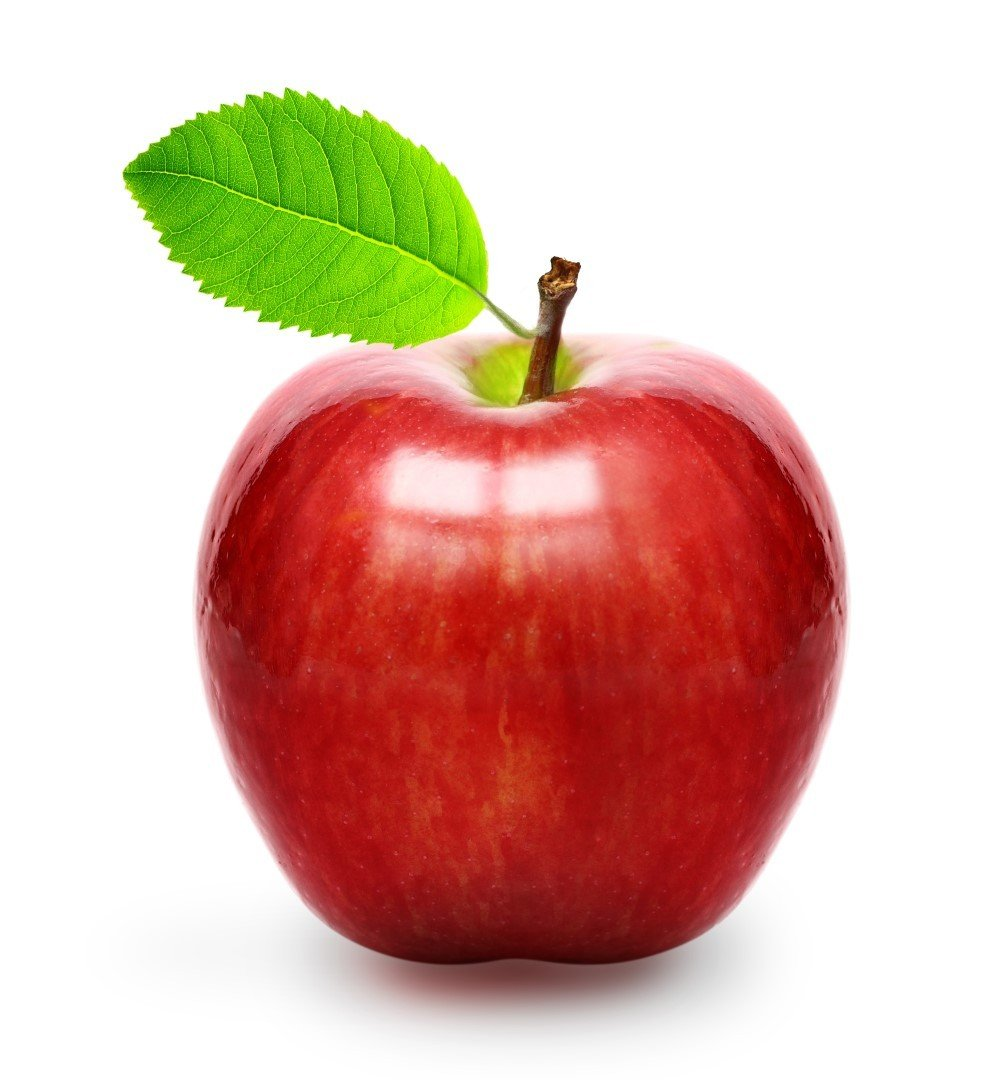

In [8]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/data/train/apple/Image_20.jpg') #open only one photo

cv2_imshow(img)

In [9]:
import os 
imges = os.listdir('/content/data/train/apple')
imges

['Image_7.jpg',
 'Image_36.jpg',
 'Image_58.jpg',
 'Image_48.jpg',
 'Image_53.png',
 'Image_57.jpg',
 'Image_83.png',
 'Image_38.jpg',
 'Image_27.jpg',
 'Image_61.jpg',
 'Image_86.jpg',
 'Image_28.jpg',
 'Image_42.jpg',
 'Image_34.jpg',
 'Image_90.jpg',
 'Image_17.jpg',
 'Image_82.jpg',
 'Image_23.jpg',
 'Image_37.jpg',
 'Image_62.jpg',
 'Image_25.jpg',
 'Image_24.jpg',
 'Image_56.jpg',
 'Image_81.png',
 'Image_92.png',
 'Image_32.jpg',
 'Image_87.jpg',
 'Image_20.jpg',
 'Image_1.jpg',
 'Image_43.jpg',
 'Image_68.jpg',
 'Image_19.jpg',
 'Image_59.png',
 'Image_40.jpg',
 'Image_76.png',
 'Image_52.jpg',
 'Image_69.jpg',
 'Image_18.jpg',
 'Image_44.jpg',
 'Image_78.jpg',
 'Image_2.jpg',
 'Image_9.jpg',
 'Image_67.jpg',
 'Image_47.jpg',
 'Image_71.png',
 'Image_65.png',
 'Image_80.jpg',
 'Image_60.jpg',
 'Image_50.jpg',
 'Image_45.jpg',
 'Image_26.jpg',
 'Image_16.jpg',
 'Image_64.jpg',
 'Image_51.jpg',
 'Image_5.JPG',
 'Image_10.jpg',
 'Image_55.jpg',
 'Image_35.png',
 'Image_3.jpg',
 'I

In [10]:
import glob
images_0 = glob.glob('/content/data/train/apple/*.jpg')
images_0


['/content/data/train/apple/Image_7.jpg',
 '/content/data/train/apple/Image_36.jpg',
 '/content/data/train/apple/Image_58.jpg',
 '/content/data/train/apple/Image_48.jpg',
 '/content/data/train/apple/Image_57.jpg',
 '/content/data/train/apple/Image_38.jpg',
 '/content/data/train/apple/Image_27.jpg',
 '/content/data/train/apple/Image_61.jpg',
 '/content/data/train/apple/Image_86.jpg',
 '/content/data/train/apple/Image_28.jpg',
 '/content/data/train/apple/Image_42.jpg',
 '/content/data/train/apple/Image_34.jpg',
 '/content/data/train/apple/Image_90.jpg',
 '/content/data/train/apple/Image_17.jpg',
 '/content/data/train/apple/Image_82.jpg',
 '/content/data/train/apple/Image_23.jpg',
 '/content/data/train/apple/Image_37.jpg',
 '/content/data/train/apple/Image_62.jpg',
 '/content/data/train/apple/Image_25.jpg',
 '/content/data/train/apple/Image_24.jpg',
 '/content/data/train/apple/Image_56.jpg',
 '/content/data/train/apple/Image_32.jpg',
 '/content/data/train/apple/Image_87.jpg',
 '/content/d

In [11]:
train_path = '/content/data/train'
test_path = '/content/data/test'
val_path = '/content/data/validation'

In [12]:
batch_size = 32
image_size = 200

train_dataset = tf.keras.preprocessing.image_dataset_from_directory( 
    train_path,
    shuffle = True,
    image_size=(image_size,image_size),
    batch_size = batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    shuffle = True,
    image_size=(image_size,image_size),
    batch_size = batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    shuffle = True,
    image_size=(image_size,image_size),
    batch_size = batch_size
)


Found 3115 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [13]:
class_names=train_dataset.class_names
class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

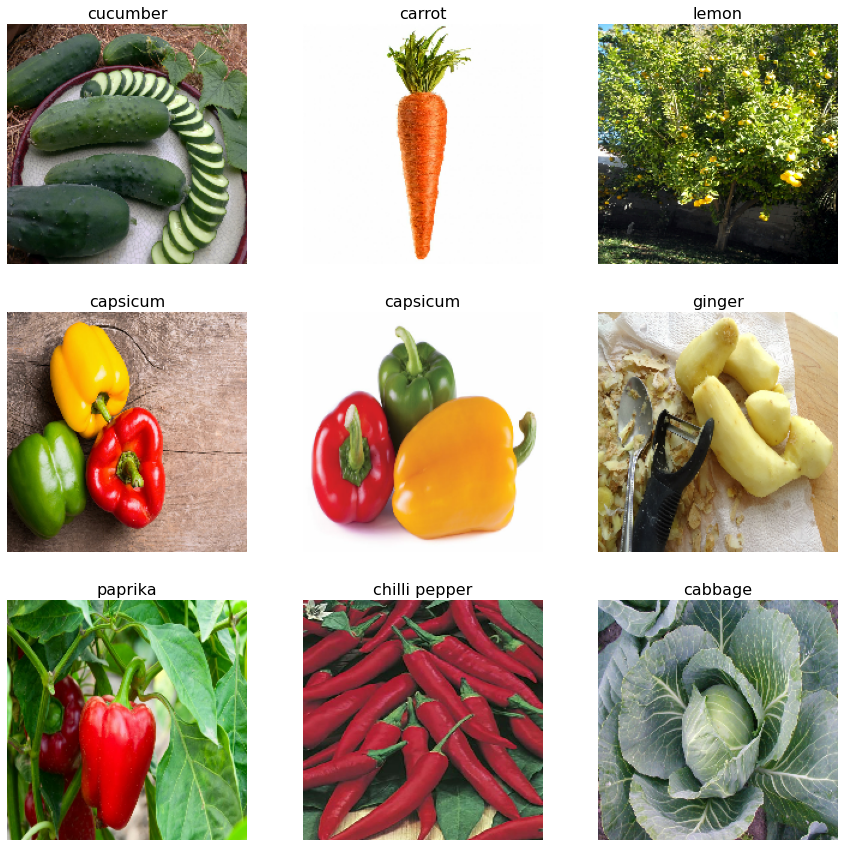

In [14]:

plt.figure(figsize=(15,15))
for image_batch , label_batch in train_dataset.take(1):
  for i in range(9):#9=3*3
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]],fontsize=16)
    plt.axis('off')


In [15]:
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [16]:
#image_size=200
model = Sequential(
    [
        layers.Conv2D(128,9,padding='same',activation='relu',input_shape=(image_size,image_size,3)),
        layers.MaxPool2D(),
        # layers.Dropout(0.50),
     
        layers.Conv2D(64,6,padding='same',activation='relu',),
        layers.MaxPool2D(),
        # layers.Dropout(0.50),


        layers.Conv2D(32,3,padding='same',activation='relu',),
        layers.MaxPool2D(),
        # layers.Dropout(0.50),


        layers.Conv2D(16,3,padding='same',activation='relu',),
        layers.MaxPool2D(),
        # layers.Dropout(0.50),
        layers.Conv2D(8,1,padding='same',activation='relu',),
        layers.MaxPool2D(),
        # layers.Dropout(0.50),
     
        layers.Flatten(),
     
        layers.Dense(224 , activation='relu'),     
        layers.Dense(200 , activation='relu'),
        layers.Dense(128 , activation='relu'),
        layers.Dense(64 , activation='relu'),
        layers.Dense(32 , activation='relu'),     
        layers.Dense(16 , activation='relu'),
        layers.Dense(36 , activation='softmax'),#36=number of classes
    ]
)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 128)     31232     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      294976    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 32)       0

In [18]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [19]:
# Epochs = 5

his = model.fit(
    train_dataset,
 epochs = 1,
 batch_size = batch_size,
 validation_data = val_dataset
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


98/98 [==============================] - 76s 622ms/step - loss: 3.6824 - accuracy: 0.0254 - val_loss: 3.5836 - val_accuracy: 0.0285


In [20]:
his.history

{'loss': [3.682431936264038],
 'accuracy': [0.025361156091094017],
 'val_loss': [3.583571195602417],
 'val_accuracy': [0.028490029275417328]}

In [21]:
acc = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

In [22]:
acc

[0.025361156091094017]

In [23]:
def predict(model,img):
  img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_array = tf.expand_dims(img_array,0)

  predictions = model.predict(img_array)
  predictions_class = class_names[np.argmax(predictions[0])]
  conf = round(100*(np.max(predictions[0])),2)
  return predictions_class , conf

1/1 [==============================] - 0s 37ms/step


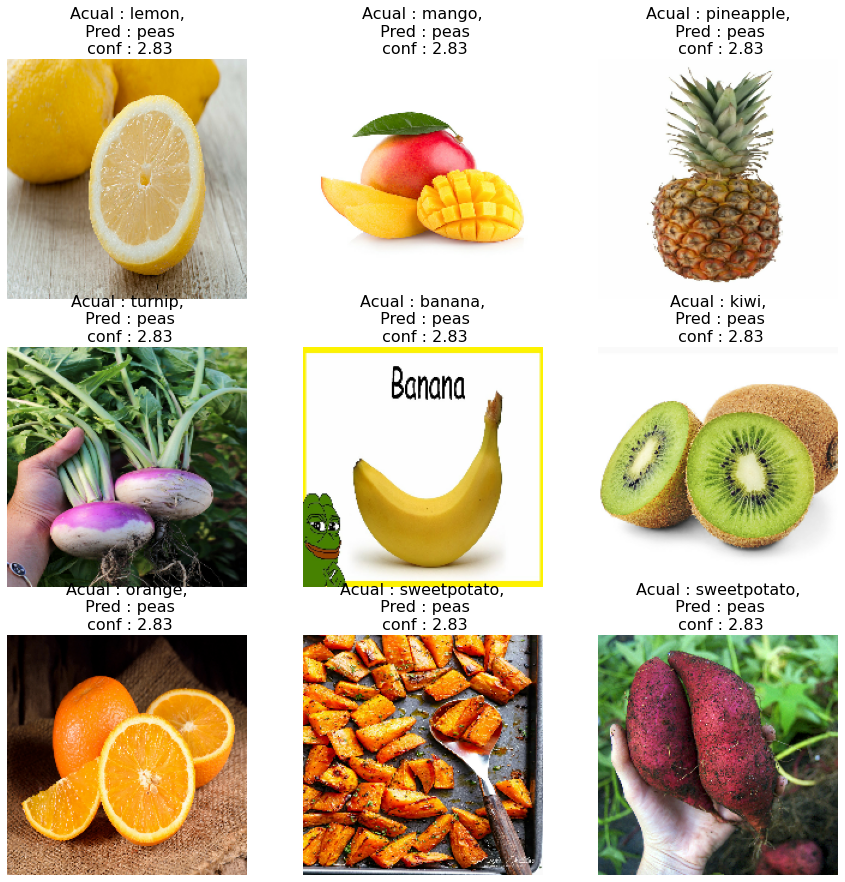

In [24]:
plt.figure(figsize=(15,15))
for images , labels in test_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    pred,conf = predict(model,images[i].numpy())
    acu_cl = class_names[labels[i]]

    plt.title(f"Acual : {acu_cl},\n Pred : {pred}\n conf : {conf}",fontsize=16)
    plt.axis('off')
